
# ASSIGNED PBR w/ pressure drop

The gas-phase reaction $A \rightarrow 2B$ occurs in a packed bed
reactor. There is a pressure drop that is characterized by $\alpha$ =
0.008 / kg cat.  Assuming the kinetics are described by $r = k P_A$,
with $k = 0.02 $ mol/atm/kg<sub>cat</sub>/h, $A$ is fed at 1 mol/hr, at a
feed pressure of 5 atm. The reactor is at 500K.

Calculate the weight of catalyst required to reach 80% conversion of A.




# solution

We have a gas-phase reaction with a pressure drop and changing moles. That means we know the volumetric flow is not constant, so we have to compute the volumetric flow in the mole balance, so we can calculate the correct concentrations for the rate laws. We use an event to stop the integration at the desired exit conversion.



80% conversion achieved at W=26.29 kg

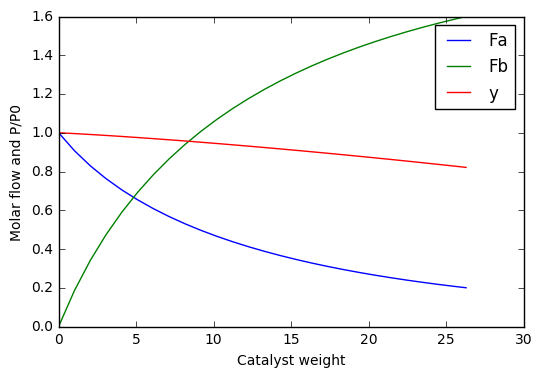

In [1]:
import numpy as np
from scipy.integrate import odeint
from pycse import odelay
import matplotlib.pyplot as plt

alpha = 0.008  # 1 / kg cat
k = 0.02       # mol / atm / kg_cat / hr
Fa0 = 1.0      # mol / hr
Fb0 = 0.0      # mol / hr
Pa0 = 5.0      # atm
T0  = 500.0    # K
R = 0.082      # L atm /(K mol)

def ode(F, W):
    Fa, Fb, y = F
    Ft = Fa + Fb 

    P = y * Pa0
    Pa = Fa / Ft * P
    r = k * Pa
    ra = -r
    rb = 2 * r

    dFadW = ra
    dFbdW = rb
    dydW = -alpha / (2 * y) * Ft / Fa0
    return [dFadW, dFbdW, dydW]

Wspan = np.linspace(0, 50)
y0 = 1
Y0 = [Fa0, Fb0, y0]

def event(F, W):
    Fa, Fb, y = F
    value = Fa - Fa0 * (1 - 0.8)
    isterminal = True
    direction = 0
    return value, isterminal, direction

W, sol, XE, YE, IE = odelay(ode, Y0, Wspan, events=[event])

print('80% conversion achieved at W={:1.2f} kg'.format(XE[0]))

plt.plot(W, sol)
plt.legend(['Fa', 'Fb', 'y'])
plt.xlabel('Catalyst weight')
plt.ylabel('Molar flow and P/P0')

It is important to include your figures inline, so it is obvious what you have done.

